In this project, first we will predict the weight based on height for both genders seperately then collectively. 
Afterwards to make the project more interesting, we will train a model to detect the gender based on the height and weight of a person

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [76]:
df = pd.read_csv('weight_height_edit.csv')

In [77]:
df.head()
#height in inches
#weight in pounds

,Gender,Height,Weight(lbs),Weight(kgs)
0,Male,73.847017,241.893563,109.702296
1,Male,68.781904,162.310473,73.610192
2,Male,74.110105,212.740856,96.481114
3,Male,71.730978,220.042470,99.792504
4,Male,69.881796,206.349801,93.582676


In [4]:
df.describe()

,Height,Weight(lbs),Weight(kgs)
count,10000.000000,10000.000000,10000.000000
mean,66.367560,161.440357,73.215581
std,3.847528,32.108439,14.561650
min,54.263133,64.700127,29.342461
25%,63.505620,135.818051,61.595488
50%,66.318070,161.212928,73.112439
75%,69.174262,187.169525,84.884138
max,78.998742,269.989698,122.444308


In [5]:
df.groupby('Gender').mean()

,Height,Weight(lbs),Weight(kgs)
Gender,,,
Female,63.708774,135.860093,61.614555
Male,69.026346,187.020621,84.816608


In [10]:
df.groupby('Gender').count()

,Height,Weight(lbs),Weight(kgs)
Gender,,,
Female,5000,5000,5000
Male,5000,5000,5000


In [11]:
df.corr()

,Height,Weight(lbs),Weight(kgs)
Height,1.000000,0.924756,0.924756
Weight(lbs),0.924756,1.000000,1.000000
Weight(kgs),0.924756,1.000000,1.000000


<AxesSubplot:ylabel='Height'>

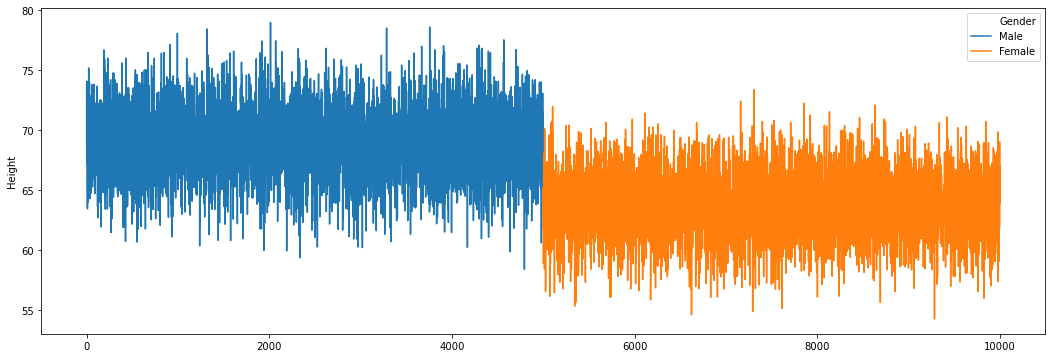

In [6]:
plt.figure(figsize=(18,6))
sns.lineplot(x=df.index,y='Height',data=df,hue='Gender')

<AxesSubplot:xlabel='Gender', ylabel='Weight(kgs)'>

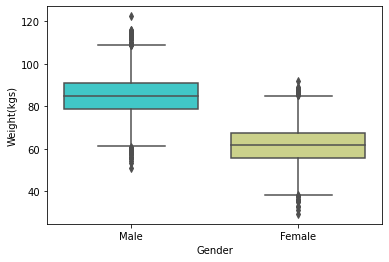

In [43]:
sns.boxplot(x="Gender", y="Weight(kgs)", data=df,palette='rainbow')

The above plot shows the range of weights in kg for both the genders the quartiles and outliers

<AxesSubplot:xlabel='Gender', ylabel='Weight(kgs)'>

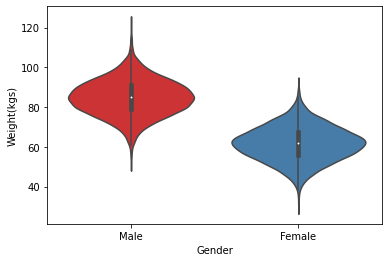

In [47]:
sns.violinplot(x="Gender", y="Weight(kgs)", data=df,palette='Set1')

The above plot shows where most of the values lie of weight for each gender

<AxesSubplot:xlabel='Gender', ylabel='Height'>

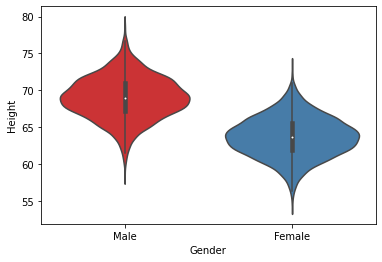

In [48]:
sns.violinplot(x="Gender", y="Height", data=df,palette='Set1')

The above plot shows where most of the values lie of height for each gender

In [12]:
df_male = df[df['Gender']=='Male']
df_female = df[df['Gender']=='Female']

<h5>Lets train a linear model to predict weight for Male</h5> <br>
1) First, Split the data into train/test

In [51]:
X_m = df_male[['Height']]
y_m = df_male['Weight(kgs)']

In [52]:
from sklearn.model_selection import train_test_split
Xm_train, Xm_test, ym_train, ym_test = train_test_split(X_m, y_m, test_size=0.4, random_state=101)

2) Second, initialize the model and fit data 

In [53]:
from sklearn.linear_model import LinearRegression
lm_m = LinearRegression()
lm_m.fit(Xm_train,ym_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

3) Lets evaluate our model by checking the model constants

In [54]:
# print the intercept
print(lm_m.intercept_)

-101.60965296137425


In [68]:
score_m = lm_m.score(Xm_test, ym_test)
print('\033[1m'+'The accuracy of the trained model for weight prediction from height for males is : {} %'.format(score_m*100))

The accuracy of the trained model for weight prediction from height for males is : 74.58883695830936 %


In [57]:
coeff_df_m = pd.DataFrame(lm_m.coef_,X_m.columns,columns=['Coefficient'])
coeff_df_m

,Coefficient
Height,2.70072


Interpreting the coefficients: <br>
Holding all other features fixed, a 1 unit increase in Height is associated with an *increase of 2.70072 of Weight*.

4) Lets visualize the predictions

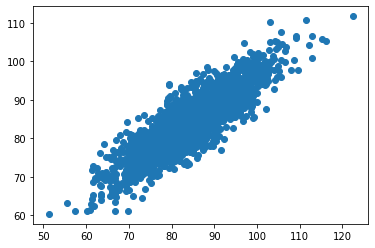

In [58]:
predictions_m = lm_m.predict(Xm_test)
plt.scatter(ym_test,predictions_m)

As you can see, there is a proper linear relation between the predicted values and original values which means the model is working properly to a certain extent

<h5>Lets do the same for Female</h5>

In [28]:
X_f = df_female[['Height']]
y_f = df_female['Weight(kgs)']

In [29]:
from sklearn.model_selection import train_test_split
Xf_train, Xf_test, yf_train, yf_test = train_test_split(X_f, y_f, test_size=0.4, random_state=101)

In [37]:
lm_f = LinearRegression()
lm_f.fit(Xf_train,yf_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
# print the intercept
print(lm_f.intercept_)

-112.16961938797056


In [67]:
score_f = lm_f.score(Xf_test, yf_test)
print('\033[1m'+'The accuracy of the trained model for weight prediction from height for females is : {} %'.format(score_f*100))

The accuracy of the trained model for weight prediction from height for females is : 71.1620085108499 %


In [41]:
coeff_df_f = pd.DataFrame(lm_f.coef_,X_f.columns,columns=['Coefficient'])
coeff_df_f

,Coefficient
Height,2.727824


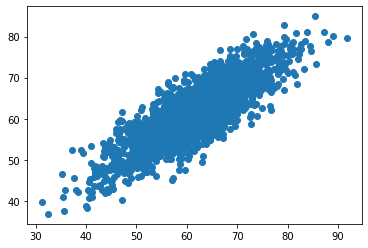

In [42]:
predictions_f = lm_f.predict(Xf_test)
plt.scatter(yf_test,predictions_f)

<h5>Now, lets do the same for the whole dataset</h5>

In [4]:
X = df[['Height']]
y = df['Weight(kgs)']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [61]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
score = lm.score(X_test, y_test)
print('\033[1m'+'The accuracy of the trained model for weight prediction from height is : {} %'.format(score*100))

The accuracy of the trained model for weight prediction from height is : 85.53110725875494 %


In [64]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Height,3.498067


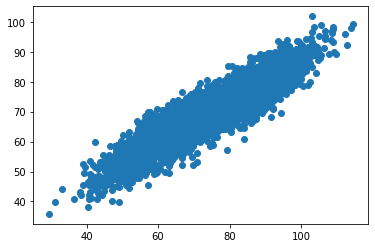

In [65]:
predictions = lm_f.predict(X_test)
plt.scatter(y_test,predictions)

<h5>Now, lets do something interesting. Lets predict the gender based on weight and height</h5>

For this we will use models which can take categorical data as variables such as logistic regression, decision tree etc.

In [21]:
df_bin = df

As we are training a model to detect the gender, we have to convert the gender into binary form where Male => 1 & Female =>0

In [23]:
gender = {'Male': 1,'Female': 0}
df_bin['Gender_bin'] = [gender[item] for item in df_bin['Gender']]

In [28]:
df_bin.head()

,Gender,Height,Weight(lbs),Weight(kgs),Gender_bin
0,Male,73.847017,241.893563,109.702296,1
1,Male,68.781904,162.310473,73.610192,1
2,Male,74.110105,212.740856,96.481114,1
3,Male,71.730978,220.042470,99.792504,1
4,Male,69.881796,206.349801,93.582676,1


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

Here we select the dependant and independant variables to traing out model, the Y variable being independant

In [29]:
X_bin = df_bin[['Height','Weight(kgs)']]
Y_bin = df_bin['Gender_bin']

Splitting our data with a test size of 30% of the whole dataset

In [30]:
Xbin_train, Xbin_test, ybin_train, ybin_test = train_test_split(X_bin, Y_bin, test_size=0.3, random_state=42)

Here we import the logistic regression model, initialize it and fit it with the training data

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
logmodel = LogisticRegression()
logmodel.fit(Xbin_train,ybin_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

After fitting the model, we get the predictions by giving the model the testing data

In [35]:
predictions_bin = logmodel.predict(Xbin_test)

Then we compare the actual results and the predictions and summarize the result constants in a short table

In [36]:
print(classification_report(ybin_test,predictions_bin))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1463
           1       0.92      0.93      0.93      1537

    accuracy                           0.92      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000



<h5>As we can see, the average precision, score and accuracy is above 90% so it is a success

<h5>You can test the model yourself by entering a value of height(inches) and weight(kgs) below in the variables and run the code

In [70]:
test_height=float()  #in inches
test_weight=float()  #in kgs
predict_test=logmodel.predict([[test_height,test_weight]])
print("when the height is {} inches and weight is {} kgs, ".format(test_height,test_weight),"the predicted gender is: ",predict_test)

when the height is 74.0 inches and weight is 80.0 kgs,  the predicted gender is:  [0]


<h4>That will all of this project!!